## Import all necessary libraries and modules

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [19]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Pandas and load in the house data

In [2]:
df = pd.read_csv('Total_with_total_living_area.csv')

df.sample(10)

In [10]:
X_train.sample(3)

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area
649,1,5.0,3.0,4,6,7.0,5,5,0.0,0,0.0,0.0,0,0.0,7,1,5.0,12,6,4,48,1,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1260.0
479,2,5.0,1.0,3,1,3.0,5,5,0.0,0,2.0,5.0,1,5.0,5,1,5.0,3,7,4,81,4,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3217.0
751,3,5.0,1.0,1,1,7.0,5,7,0.0,0,2.0,5.0,3,5.0,9,1,7.0,8,5,7,15,2,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2428.0


#### Split the data into training, test, and validation sets as follows:

In [ ]:
train_data = df.iloc[:1460,:]
test_data = df.iloc[1460:, :]

In [5]:
# Separated the train data into input features and output feature
train_data_X = train_data.drop('SalePrice', axis = 1)
train_data_y = train_data['SalePrice']

# Separated the test data into input features and output feature
test_data_X = test_data.drop('SalePrice', axis = 1)
test_data_y = test_data['SalePrice']

# Split the train data into train and test(validation data)
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size = 0.3, random_state = 101)

In [11]:
X_test.sample(3)

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area
246,4,5.0,1.0,1,1,3.0,3,5,0.0,0,1.0,2.0,1,2.0,7,2,3.0,4,8,6,108,3,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3560.0
849,3,5.0,1.0,1,1,5.0,7,7,5.0,1,2.0,5.0,2,5.0,9,1,5.0,8,7,6,42,3,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3468.0
337,3,5.0,3.0,6,1,7.0,5,7,0.0,0,2.0,5.0,2,5.0,9,1,7.0,12,5,7,16,3,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3983.0


In [12]:
y_train.sample(3)

333     12.240474
1375    12.384219
1420    12.100156
Name: SalePrice, dtype: float64

In [13]:

y_test.sample(3)

1122    11.626254
23      11.774520
141     12.468437
Name: SalePrice, dtype: float64

In [15]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [16]:
scaler = Normalizer().fit(X_train)
normalizedX_train = scaler.transform(X_train)
np.set_printoptions(precision=3)
print(normalizedX_train[0:5,:])

[[6.839e-04 8.548e-04 1.710e-04 1.026e-03 1.710e-04 1.539e-03 8.548e-04
  1.197e-03 1.539e-03 1.710e-04 3.419e-04 1.197e-03 3.419e-04 1.197e-03
  1.539e-03 1.710e-04 1.197e-03 1.026e-03 8.548e-04 1.368e-03 4.787e-03
  6.839e-04 5.129e-04 1.710e-04 0.000e+00 1.710e-04 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.710e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04
  0.000e+00 0.000e+00 1.710e-04 0.000e+00 0.000e+00 0.000e+00 1.710e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.710e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00 0.000e+00
  1.710e-04 0.000e+00 1.710e-04 0.000e+00 0.000e+00 0.000e+00 1.710e-04
  1.710e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

#### Feature Normalization

In [17]:
scaler = Normalizer().fit(X_test)
normalizedX_test = scaler.transform(X_test)
np.set_printoptions(precision=3)
print(normalizedX_test[0:5,:])

[[7.301e-04 1.217e-03 4.867e-04 1.460e-03 2.434e-04 1.704e-03 1.217e-03
  1.704e-03 1.704e-03 2.434e-04 4.867e-04 1.217e-03 7.301e-04 1.217e-03
  2.190e-03 2.434e-04 1.704e-03 2.677e-03 1.217e-03 1.947e-03 3.894e-03
  7.301e-04 9.734e-04 2.434e-04 0.000e+00 2.434e-04 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.434e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00
  0.000e+00 0.000e+00 2.434e-04 0.000e+00 0.000e+00 0.000e+00 2.434e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.434e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.434e-04 0.000e+00 2.434e-04 0.000e+00 0.000e+00 0.000e+00 2.434e-04
  2.434e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [72]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_manhattan_auto = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan')

    model_manhattan_auto.fit(X_train, y_train)  #fit the model
    pred=model_manhattan_auto.predict(X_test) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_manhattan_auto_df = pd.DataFrame({'RMSE':rmse_val})

model_manhattan_auto_df['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_manhattan_auto_df)

RMSE value for k=  1 is: 0.2279848656862834
RMSE value for k=  2 is: 0.21826554302830642
RMSE value for k=  3 is: 0.20687174055233698
RMSE value for k=  4 is: 0.20070343044418903
RMSE value for k=  5 is: 0.20020176517013097
RMSE value for k=  6 is: 0.2005786318963553
RMSE value for k=  7 is: 0.20056515668351688
RMSE value for k=  8 is: 0.20095258495189008
RMSE value for k=  9 is: 0.20263319423748874
RMSE value for k=  10 is: 0.20175875604161844
RMSE value for k=  11 is: 0.20212376221336628
RMSE value for k=  12 is: 0.2032068338449505
RMSE value for k=  13 is: 0.2026508499962694
RMSE value for k=  14 is: 0.20179129661873885
RMSE value for k=  15 is: 0.20160612207600295
RMSE value for k=  16 is: 0.20260055705540647
RMSE value for k=  17 is: 0.20157982347317352
RMSE value for k=  18 is: 0.20224203415949418
RMSE value for k=  19 is: 0.20282773998785358
RMSE value for k=  20 is: 0.203301466940756
        RMSE  n_neighbors
0   0.227985            1
1   0.218266            2
2   0.206872     

#### DIFFERENT MODELS

In [33]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_manhattan_brute = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan', algorithm = 'brute')

    model_manhattan_brute.fit(X_train, y_train)  #fit the model
    pred=model_manhattan_brute.predict(X_test) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_manhattan_brute_df = pd.DataFrame({'RMSE':rmse_val})

model_manhattan_brute_df['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_manhattan_brute_df)

RMSE value for k=  1 is: 0.22767704632501637
RMSE value for k=  2 is: 0.21628693560298284
RMSE value for k=  3 is: 0.20715650912822378
RMSE value for k=  4 is: 0.2009336068350012
RMSE value for k=  5 is: 0.19974463920347982
RMSE value for k=  6 is: 0.19915480006747707
RMSE value for k=  7 is: 0.2002777227177239
RMSE value for k=  8 is: 0.20162519330119114
RMSE value for k=  9 is: 0.20228142613126718
RMSE value for k=  10 is: 0.2015263361163804
RMSE value for k=  11 is: 0.20232584000261924
RMSE value for k=  12 is: 0.2015926056024454
RMSE value for k=  13 is: 0.2022686137328657
RMSE value for k=  14 is: 0.20261487448246726
RMSE value for k=  15 is: 0.2026856076657027
RMSE value for k=  16 is: 0.20277378566802104
RMSE value for k=  17 is: 0.2016603764554698
RMSE value for k=  18 is: 0.2022325131310046
RMSE value for k=  19 is: 0.20364186191975542
RMSE value for k=  20 is: 0.2038597161205781
        RMSE  n_neighbors
0   0.227677            1
1   0.216287            2
2   0.207157        

In [34]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_manhattan_ball_tree = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan', algorithm = 'ball_tree')

    model_manhattan_ball_tree.fit(X_train, y_train)  #fit the model
    pred=model_manhattan_ball_tree.predict(X_test) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_manhattan_ball_tree_df = pd.DataFrame({'RMSE':rmse_val})

model_manhattan_ball_tree_df['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_manhattan_ball_tree_df)

RMSE value for k=  1 is: 0.22653175967493697
RMSE value for k=  2 is: 0.21642392436468233
RMSE value for k=  3 is: 0.2069123383779627
RMSE value for k=  4 is: 0.20072598959194612
RMSE value for k=  5 is: 0.19994351882674982
RMSE value for k=  6 is: 0.19971881861397117
RMSE value for k=  7 is: 0.20001768705122253
RMSE value for k=  8 is: 0.20153558892640946
RMSE value for k=  9 is: 0.20222035134715696
RMSE value for k=  10 is: 0.20177383311143082
RMSE value for k=  11 is: 0.20261554972310328
RMSE value for k=  12 is: 0.2016116621979813
RMSE value for k=  13 is: 0.20234925779611668
RMSE value for k=  14 is: 0.20257666144847147
RMSE value for k=  15 is: 0.2027542588923686
RMSE value for k=  16 is: 0.20285085313556314
RMSE value for k=  17 is: 0.20170325762098262
RMSE value for k=  18 is: 0.20260728240305043
RMSE value for k=  19 is: 0.20374744816357745
RMSE value for k=  20 is: 0.20394955798043307
        RMSE  n_neighbors
0   0.226532            1
1   0.216424            2
2   0.206912  

In [ ]:
## Euclidean

In [35]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_euclidean_auto = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'euclidean')

    model_euclidean_auto.fit(X_train, y_train)  #fit the model
    pred=model_euclidean_auto.predict(X_test) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_euclidean_auto_df = pd.DataFrame({'RMSE':rmse_val})

model_euclidean_auto_df['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_euclidean_auto_df)

RMSE value for k=  1 is: 0.24125018528981593
RMSE value for k=  2 is: 0.22859265111193516
RMSE value for k=  3 is: 0.2169860107143807
RMSE value for k=  4 is: 0.21415005217332406
RMSE value for k=  5 is: 0.21286047453899032
RMSE value for k=  6 is: 0.21301704490974213
RMSE value for k=  7 is: 0.21252873723449706
RMSE value for k=  8 is: 0.21230626490583576
RMSE value for k=  9 is: 0.21207167289707146
RMSE value for k=  10 is: 0.2111008126032414
RMSE value for k=  11 is: 0.2117373211547985
RMSE value for k=  12 is: 0.21219852028987618
RMSE value for k=  13 is: 0.21133239668026646
RMSE value for k=  14 is: 0.2128124246728219
RMSE value for k=  15 is: 0.2127960558515315
RMSE value for k=  16 is: 0.2124473292870946
RMSE value for k=  17 is: 0.21340232731125486
RMSE value for k=  18 is: 0.21437647495334924
RMSE value for k=  19 is: 0.21486746557084604
RMSE value for k=  20 is: 0.21447787168855495
        RMSE  n_neighbors
0   0.241250            1
1   0.228593            2
2   0.216986     

In [36]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_euclidean_brute = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'euclidean', algorithm = 'brute')

    model_euclidean_brute.fit(X_train, y_train)  #fit the model
    pred=model_euclidean_brute.predict(X_test) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_euclidean_brute_df = pd.DataFrame({'RMSE':rmse_val})

model_euclidean_brute_df['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_euclidean_brute_df)

RMSE value for k=  1 is: 0.24125709323820504
RMSE value for k=  2 is: 0.22858857369229355
RMSE value for k=  3 is: 0.21766002358840844
RMSE value for k=  4 is: 0.21415169632086564
RMSE value for k=  5 is: 0.21286047453899032
RMSE value for k=  6 is: 0.21301704490974216
RMSE value for k=  7 is: 0.2125226292696658
RMSE value for k=  8 is: 0.21230626490583576
RMSE value for k=  9 is: 0.21207167289707146
RMSE value for k=  10 is: 0.2111470981622198
RMSE value for k=  11 is: 0.2117373211547985
RMSE value for k=  12 is: 0.21218075091896046
RMSE value for k=  13 is: 0.21133520507068954
RMSE value for k=  14 is: 0.21282425817388886
RMSE value for k=  15 is: 0.21277718883499613
RMSE value for k=  16 is: 0.21246711096555085
RMSE value for k=  17 is: 0.2134031545315721
RMSE value for k=  18 is: 0.21437647495334924
RMSE value for k=  19 is: 0.21486581569503907
RMSE value for k=  20 is: 0.21447355086402684
        RMSE  n_neighbors
0   0.241257            1
1   0.228589            2
2   0.217660   

In [37]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_euclidean_ball_tree = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'euclidean', algorithm = 'ball_tree')

    model_euclidean_ball_tree.fit(X_train, y_train)  #fit the model
    pred=model_euclidean_ball_tree.predict(X_test) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_euclidean_ball_tree_df = pd.DataFrame({'RMSE':rmse_val})

model_euclidean_ball_tree_df['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_euclidean_ball_tree_df)

RMSE value for k=  1 is: 0.24125018528981593
RMSE value for k=  2 is: 0.22859265111193516
RMSE value for k=  3 is: 0.2169860107143807
RMSE value for k=  4 is: 0.21415169632086564
RMSE value for k=  5 is: 0.21286047453899032
RMSE value for k=  6 is: 0.21301704490974213
RMSE value for k=  7 is: 0.21255574637567168
RMSE value for k=  8 is: 0.21230626490583576
RMSE value for k=  9 is: 0.2120696428215307
RMSE value for k=  10 is: 0.2111008126032414
RMSE value for k=  11 is: 0.2117373211547985
RMSE value for k=  12 is: 0.21218075091896046
RMSE value for k=  13 is: 0.21133239668026646
RMSE value for k=  14 is: 0.2128150182774799
RMSE value for k=  15 is: 0.21279044702218833
RMSE value for k=  16 is: 0.2124737102449506
RMSE value for k=  17 is: 0.2134031545315721
RMSE value for k=  18 is: 0.21437647495334924
RMSE value for k=  19 is: 0.21486746557084604
RMSE value for k=  20 is: 0.2145059843780958
        RMSE  n_neighbors
0   0.241250            1
1   0.228593            2
2   0.216986       

In [76]:
!pwd

/Users/rajesharasada/Desktop/MachineLearningProject


In [96]:
knn_bedrooms = pd.read_csv('KNN_rmse_Bedroms.csv')

In [97]:
knn_bedrooms


,n_neighbors,Manhattan_auto,Manhattan_brute,Manhattan_ball_tree,Euclidean_auto,Euclidean_brute,Euclidean_ball_tree
0,1,0.225617,0.227677,0.226532,0.241250,0.241257,0.241250
1,2,0.216276,0.216287,0.216424,0.228593,0.228589,0.228593
2,3,0.207232,0.207157,0.206912,0.216986,0.217660,0.216986
3,4,0.200734,0.200934,0.200726,0.214150,0.214152,0.214152
4,5,0.199637,0.199745,0.199944,0.212860,0.212860,0.212860
5,6,0.199781,0.199155,0.199719,0.213017,0.213017,0.213017
6,7,0.200246,0.200278,0.200018,0.212529,0.212523,0.212556
7,8,0.200865,0.201625,0.201536,0.212306,0.212306,0.212306
8,9,0.201956,0.202281,0.202220,0.212072,0.212072,0.212070
9,10,0.201792,0.201526,0.201774,0.211101,0.211147,0.211101


Text(0.5,1,'Euclidean Distance')

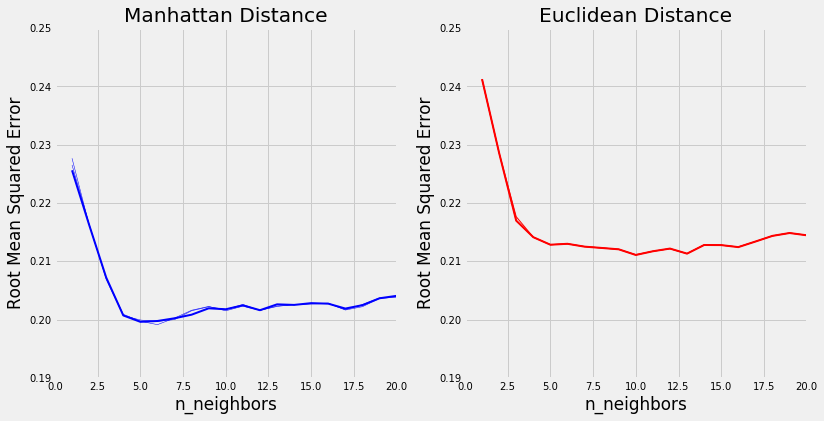

In [138]:
#fig, ax = plt.subplots(figsize=(12,6))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))



axes[0].plot(knn_bedrooms['n_neighbors'], knn_bedrooms['Manhattan_auto'], color="blue", linewidth=2)
axes[0].plot(knn_bedrooms['n_neighbors'], knn_bedrooms['Manhattan_brute'], color="blue", linewidth=0.50)
axes[0].plot(knn_bedrooms['n_neighbors'], knn_bedrooms['Manhattan_ball_tree'], color="blue", linewidth=0.50)
axes[0].axis('tight')
axes[0].tick_params(axis = 'both', which = 'major', labelsize = 10)
axes[0].set_ylim([.19, .25])
axes[0].set_xlim([0, 20])
axes[0].tick_params(axis = 'both', which = 'major', labelsize = 10)
axes[0].set_ylabel("Root Mean Squared Error")
axes[0].set_xlabel("n_neighbors")
axes[0].set_title("Manhattan Distance")


axes[1].plot(knn_bedrooms['n_neighbors'], knn_bedrooms['Euclidean_auto'], color="red", linewidth=2.00)
axes[1].plot(knn_bedrooms['n_neighbors'], knn_bedrooms['Euclidean_brute'], color="red", linewidth=1.00)
axes[1].plot(knn_bedrooms['n_neighbors'], knn_bedrooms['Euclidean_ball_tree'], color="red", linewidth=1.00)
axes[1].axis('tight')
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 10)
axes[1].set_ylim([.19, .25])
axes[1].set_xlim([0, 20])
axes[1].tick_params(axis = 'both', which = 'major', labelsize = 10)
axes[1].set_ylabel("Root Mean Squared Error")
axes[1].set_xlabel("n_neighbors")
axes[1].set_title("Euclidean Distance")


## Bedroom Squared Models

In [38]:
df2 = pd.read_csv('Total_with_total_living_area.csv')

df2.sample(10)

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,SalePrice,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area
651,4,5.0,2.0,1,1,5.0,5,5,7.0,1,1.0,2.0,1,3.0,5,1,5.0,10,5,4,11.589887,78,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2681.000000
208,3,5.0,4.0,6,1,7.0,5,7,7.0,1,2.0,5.0,3,5.0,9,1,5.0,4,5,7,12.531773,30,3,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4070.000000
2165,3,5.0,1.0,6,1,7.0,5,5,0.0,0,2.0,5.0,1,5.0,9,1,5.0,8,7,5,NaN,24,1,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2676.000000
2874,3,5.0,3.0,4,1,5.0,5,5,0.0,0,1.0,5.0,1,5.0,5,1,5.0,7,6,6,NaN,73,2,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0

In [39]:
df2['Bedroom_Squared'] = df2['BedroomAbvGr']**2

In [40]:
df2.drop('BedroomAbvGr', axis = 1, inplace = True)

In [42]:
train_data_2 = df2.iloc[:1460,:]
test_data_2 = df2.iloc[1460:, :]

In [44]:
train_data_2_X = train_data_2.drop('SalePrice', axis = 1)
train_data_2_y = train_data_2['SalePrice']

In [45]:
test_data_2_X = test_data_2.drop('SalePrice', axis = 1)
test_data_2_y = test_data_2['SalePrice']

In [48]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_data_2_X, train_data_2_y, test_size = 0.3, random_state = 101)

In [49]:
X_test_2.sample(3)

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area,Bedroom_Squared
334,5.0,4.0,6,1,7.0,5,5,5.0,2,2.0,5.0,3,5.0,7,1,5.0,7,5,6,20,3,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3191.0,9
533,0.0,0.0,0,0,0.0,3,3,0.0,0,0.0,0.0,0,0.0,3,1,3.0,1,3,1,72,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,334.0,1
902,5.0,1.0,1,1,7.0,5,7,7.0,1,2.0,5.0,3,5.0,9,1,7.0,7,5,7,15,4,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2760.0,9


In [50]:
y_train_2.sample(3)

375    11.018629
97     11.458997
655    11.385092
Name: SalePrice, dtype: float64

In [51]:
y_test_2.sample(3)

353    11.570251
674    11.849398
61     11.522876
Name: SalePrice, dtype: float64

In [53]:
from sklearn.preprocessing import Normalizer

In [52]:
X_train_2 = X_train_2.values
y_train_2 = y_train_2.values
X_test_2 = X_test_2.values
y_test_2 = y_test_2.values

In [54]:
scaler = Normalizer().fit(X_train_2)
normalizedX_train_2 = scaler.transform(X_train_2)
np.set_printoptions(precision=3)
print(normalizedX_train_2[0:5,:])

[[8.548e-04 1.710e-04 1.026e-03 1.710e-04 1.539e-03 8.548e-04 1.197e-03
  1.539e-03 1.710e-04 3.419e-04 1.197e-03 3.419e-04 1.197e-03 1.539e-03
  1.710e-04 1.197e-03 1.026e-03 8.548e-04 1.368e-03 4.787e-03 6.839e-04
  5.129e-04 1.710e-04 0.000e+00 1.710e-04 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00
  0.000e+00 1.710e-04 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.710e-04 0.000e+00 0.000e+00 1.710e-04
  0.000e+00 1.710e-04 0.000e+00 0.000e+00 0.000e+00 1.710e-04 1.710e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [55]:
scaler = Normalizer().fit(X_test_2)
normalizedX_test_2 = scaler.transform(X_test_2)
np.set_printoptions(precision=3)
print(normalizedX_test_2[0:5,:])

[[1.217e-03 4.867e-04 1.460e-03 2.434e-04 1.704e-03 1.217e-03 1.704e-03
  1.704e-03 2.434e-04 4.867e-04 1.217e-03 7.301e-04 1.217e-03 2.190e-03
  2.434e-04 1.704e-03 2.677e-03 1.217e-03 1.947e-03 3.894e-03 7.301e-04
  9.734e-04 2.434e-04 0.000e+00 2.434e-04 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00 0.000e+00
  0.000e+00 2.434e-04 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.434e-04
  0.000e+00 2.434e-04 0.000e+00 0.000e+00 0.000e+00 2.434e-04 2.434e-04
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [56]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_manhattan_auto = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan')

    model_manhattan_auto.fit(X_train_2, y_train_2)  #fit the model
    pred= model_manhattan_auto.predict(X_test_2) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test_2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_manhattan_auto_df_2 = pd.DataFrame({'RMSE':rmse_val})

model_manhattan_auto_df_2['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_manhattan_auto_df_2)

RMSE value for k=  1 is: 0.2279848656862834
RMSE value for k=  2 is: 0.21826554302830642
RMSE value for k=  3 is: 0.20687174055233698
RMSE value for k=  4 is: 0.20070343044418903
RMSE value for k=  5 is: 0.20020176517013097
RMSE value for k=  6 is: 0.2005786318963553
RMSE value for k=  7 is: 0.20056515668351688
RMSE value for k=  8 is: 0.20095258495189008
RMSE value for k=  9 is: 0.20263319423748874
RMSE value for k=  10 is: 0.20175875604161844
RMSE value for k=  11 is: 0.20212376221336628
RMSE value for k=  12 is: 0.2032068338449505
RMSE value for k=  13 is: 0.2026508499962694
RMSE value for k=  14 is: 0.20179129661873885
RMSE value for k=  15 is: 0.20160612207600295
RMSE value for k=  16 is: 0.20260055705540647
RMSE value for k=  17 is: 0.20157982347317352
RMSE value for k=  18 is: 0.20224203415949418
RMSE value for k=  19 is: 0.20282773998785358
RMSE value for k=  20 is: 0.203301466940756
        RMSE  n_neighbors
0   0.227985            1
1   0.218266            2
2   0.206872     

In [70]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_manhattan_brute = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan', algorithm = 'brute')

    model_manhattan_brute.fit(X_train_2, y_train_2)  #fit the model
    pred=model_manhattan_brute.predict(X_test_2) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test_2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_manhattan_brute_df_2 = pd.DataFrame({'RMSE':rmse_val})

model_manhattan_brute_df_2['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_manhattan_brute_df_2)

RMSE value for k=  1 is: 0.22482770479635095
RMSE value for k=  2 is: 0.21845849344157153
RMSE value for k=  3 is: 0.20733708174421206
RMSE value for k=  4 is: 0.2007975581529733
RMSE value for k=  5 is: 0.19981596282920602
RMSE value for k=  6 is: 0.20003373331187826
RMSE value for k=  7 is: 0.1999927210021228
RMSE value for k=  8 is: 0.2007319335845758
RMSE value for k=  9 is: 0.20239342112643305
RMSE value for k=  10 is: 0.20194473331882587
RMSE value for k=  11 is: 0.2023184810174833
RMSE value for k=  12 is: 0.2033108543366748
RMSE value for k=  13 is: 0.20254400844138437
RMSE value for k=  14 is: 0.20171546286098885
RMSE value for k=  15 is: 0.20161127984005844
RMSE value for k=  16 is: 0.20284176988405925
RMSE value for k=  17 is: 0.20152721760641754
RMSE value for k=  18 is: 0.20225357441242556
RMSE value for k=  19 is: 0.20286460259422207
RMSE value for k=  20 is: 0.20319014136620572
        RMSE  n_neighbors
0   0.224828            1
1   0.218458            2
2   0.207337    

In [69]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_manhattan_ball_tree = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'manhattan', algorithm = 'ball_tree')

    model_manhattan_ball_tree.fit(X_train_2, y_train_2)  #fit the model
    pred=model_manhattan_ball_tree.predict(X_test_2) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test_2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_manhattan_ball_tree_df_2 = pd.DataFrame({'RMSE':rmse_val})

model_manhattan_ball_tree_df_2['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_manhattan_ball_tree_df_2)

RMSE value for k=  1 is: 0.22888971008305553
RMSE value for k=  2 is: 0.2185740118921448
RMSE value for k=  3 is: 0.20645029372881205
RMSE value for k=  4 is: 0.20087618308169614
RMSE value for k=  5 is: 0.20063503256333468
RMSE value for k=  6 is: 0.20053225887947101
RMSE value for k=  7 is: 0.20042271298857414
RMSE value for k=  8 is: 0.2007327183823825
RMSE value for k=  9 is: 0.2026824819708155
RMSE value for k=  10 is: 0.20207350326582796
RMSE value for k=  11 is: 0.2025093307004814
RMSE value for k=  12 is: 0.20322662805017266
RMSE value for k=  13 is: 0.2022871957323351
RMSE value for k=  14 is: 0.20172710122585719
RMSE value for k=  15 is: 0.20144733030306128
RMSE value for k=  16 is: 0.20240775565612876
RMSE value for k=  17 is: 0.20141991819872734
RMSE value for k=  18 is: 0.20220689458754748
RMSE value for k=  19 is: 0.20275438972310864
RMSE value for k=  20 is: 0.2033089431391852
        RMSE  n_neighbors
0   0.228890            1
1   0.218574            2
2   0.206450     

In [68]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_euclidean_auto = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'euclidean')

    model_euclidean_auto.fit(X_train_2, y_train_2)  #fit the model
    pred=model_euclidean_auto.predict(X_test_2) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test_2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_euclidean_auto_df_2 = pd.DataFrame({'RMSE':rmse_val})

model_euclidean_auto_df_2['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_euclidean_auto_df_2)

RMSE value for k=  1 is: 0.24158119780665469
RMSE value for k=  2 is: 0.22683887272578374
RMSE value for k=  3 is: 0.21915092681723827
RMSE value for k=  4 is: 0.21284470363215652
RMSE value for k=  5 is: 0.21264525960285935
RMSE value for k=  6 is: 0.21162249031948024
RMSE value for k=  7 is: 0.21266511620099363
RMSE value for k=  8 is: 0.2127695753416936
RMSE value for k=  9 is: 0.21134049462736218
RMSE value for k=  10 is: 0.21063521025869167
RMSE value for k=  11 is: 0.21168744555133487
RMSE value for k=  12 is: 0.21221374799130696
RMSE value for k=  13 is: 0.21113668008716707
RMSE value for k=  14 is: 0.21230350502305098
RMSE value for k=  15 is: 0.21257047423145378
RMSE value for k=  16 is: 0.21292568888801316
RMSE value for k=  17 is: 0.21370552641277024
RMSE value for k=  18 is: 0.21424134764072125
RMSE value for k=  19 is: 0.21409506520921628
RMSE value for k=  20 is: 0.21380924336354784
        RMSE  n_neighbors
0   0.241581            1
1   0.226839            2
2   0.219151

In [67]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_euclidean_brute = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'euclidean', algorithm = 'brute')

    model_euclidean_brute.fit(X_train_2, y_train_2)  #fit the model
    pred=model_euclidean_brute.predict(X_test_2) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test_2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_euclidean_brute_df_2 = pd.DataFrame({'RMSE':rmse_val})

model_euclidean_brute_df_2['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_euclidean_brute_df_2)

RMSE value for k=  1 is: 0.24158809629010172
RMSE value for k=  2 is: 0.22677691273295783
RMSE value for k=  3 is: 0.21912267098165963
RMSE value for k=  4 is: 0.21341315777873396
RMSE value for k=  5 is: 0.21264525960285935
RMSE value for k=  6 is: 0.21155995300148525
RMSE value for k=  7 is: 0.21266511620099368
RMSE value for k=  8 is: 0.2127695753416936
RMSE value for k=  9 is: 0.21134061274086005
RMSE value for k=  10 is: 0.21076509134726162
RMSE value for k=  11 is: 0.21168744555133487
RMSE value for k=  12 is: 0.21219303456007285
RMSE value for k=  13 is: 0.21113668008716707
RMSE value for k=  14 is: 0.21230771342312754
RMSE value for k=  15 is: 0.21255720232352993
RMSE value for k=  16 is: 0.21294439930854783
RMSE value for k=  17 is: 0.2137063524594562
RMSE value for k=  18 is: 0.21424134764072122
RMSE value for k=  19 is: 0.21409361625988557
RMSE value for k=  20 is: 0.21383744395604914
        RMSE  n_neighbors
0   0.241588            1
1   0.226777            2
2   0.219123 

In [66]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model_euclidean_ball_tree = neighbors.KNeighborsRegressor(n_neighbors = K, metric = 'euclidean', algorithm = 'ball_tree')

    model_euclidean_ball_tree.fit(X_train_2, y_train_2)  #fit the model
    pred=model_euclidean_ball_tree.predict(X_test_2) #make prediction on test set
    #mean_squared_error
    #rss_all[k-1] = np.sum((predictions_k-validating_output)**2)
    error = sqrt(mean_squared_error(y_test_2,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    model_euclidean_ball_tree_df_2 = pd.DataFrame({'RMSE':rmse_val})

model_euclidean_ball_tree_df_2['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print (model_euclidean_ball_tree_df_2)

RMSE value for k=  1 is: 0.24158119780665469
RMSE value for k=  2 is: 0.22683887272578374
RMSE value for k=  3 is: 0.21912267098165963
RMSE value for k=  4 is: 0.21284635786296036
RMSE value for k=  5 is: 0.21264525960285935
RMSE value for k=  6 is: 0.211547416436198
RMSE value for k=  7 is: 0.21266511620099363
RMSE value for k=  8 is: 0.2127695753416936
RMSE value for k=  9 is: 0.21134049462736218
RMSE value for k=  10 is: 0.21064847853279875
RMSE value for k=  11 is: 0.21168960839909584
RMSE value for k=  12 is: 0.2121959798955647
RMSE value for k=  13 is: 0.21113668008716707
RMSE value for k=  14 is: 0.21231096494470555
RMSE value for k=  15 is: 0.2125648594498154
RMSE value for k=  16 is: 0.21294943173426556
RMSE value for k=  17 is: 0.2137063524594562
RMSE value for k=  18 is: 0.21424134764072125
RMSE value for k=  19 is: 0.2140950652092163
RMSE value for k=  20 is: 0.21383744395604914
        RMSE  n_neighbors
0   0.241581            1
1   0.226839            2
2   0.219123      